```
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_csv("../../Datasets/price.csv")
```
Yukarıda yer alan kodu kullanarak
1. Verinin içeriğine bakılması
2. Tarih Verisinin indis haline getirilmesi
3. frekansın iş günü haline getirilmesi
4. Bonds sütunu için grafik çizilmesi
5. Bonds Sütununu dikkate alarak `lags`,`shifted` değerlerinin hesaplanması
6. Bonds dikkate alarak yüzdelik değişimin hesaplanması 
işlemlerini gerçekleştirelim


In [9]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_csv("../../Datasets/price.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2469 non-null   object 
 1   SP500   2469 non-null   float64
 2   Bonds   2469 non-null   float64
 3   Gold    2469 non-null   float64
 4   Oil     2469 non-null   float64
dtypes: float64(4), object(1)
memory usage: 96.6+ KB


In [3]:
df.head()

,DATE,SP500,Bonds,Gold,Oil
0,2007-06-29,1503.35,402.15,648.50,70.47
1,2007-07-02,1519.43,402.96,650.50,71.11
2,2007-07-03,1524.87,402.02,657.25,71.41
3,2007-07-05,1525.40,400.15,655.90,71.81
4,2007-07-06,1530.44,399.31,647.75,72.80


In [10]:
df['DATE'] = pd.to_datetime(df.DATE)
df.set_index('DATE',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


In [11]:
df.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


In [13]:
df.asfreq('B').head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-04,NaN,NaN,NaN,NaN
2007-07-05,1525.40,400.15,655.90,71.81


<Axes: xlabel='DATE'>

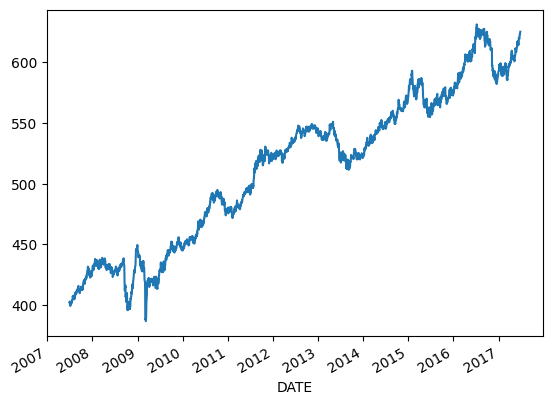

In [14]:
df.Bonds.plot()

In [15]:
df["return_Bonds_3d"] = df.Bonds.pct_change(periods=1).mul(100)

In [16]:
df

,SP500,Bonds,Gold,Oil,return_Bonds_3d
DATE,,,,,
2007-06-29,1503.35,402.15,648.50,70.47,NaN
2007-07-02,1519.43,402.96,650.50,71.11,0.201417
2007-07-03,1524.87,402.02,657.25,71.41,-0.233274
2007-07-05,1525.40,400.15,655.90,71.81,-0.465151
2007-07-06,1530.44,399.31,647.75,72.80,-0.209921
...,...,...,...,...,...
2017-06-20,2437.03,621.84,1246.50,43.34,0.439333
2017-06-21,2435.61,622.94,1247.05,42.48,0.176894
2017-06-22,2434.50,622.93,1251.40,42.53,-0.001605


In [17]:
tarihler = pd.date_range(start='2023',periods=4,freq='Q')
veri = range(1,5)
seri1 = pd.Series(data=veri,index=tarihler)
seri1

2023-03-31    1
2023-06-30    2
2023-09-30    3
2023-12-31    4
Freq: Q-DEC, dtype: int64

In [18]:
aylik = seri1.asfreq('M')
aylik

2023-03-31    1.0
2023-04-30    NaN
2023-05-31    NaN
2023-06-30    2.0
2023-07-31    NaN
2023-08-31    NaN
2023-09-30    3.0
2023-10-31    NaN
2023-11-30    NaN
2023-12-31    4.0
Freq: M, dtype: float64

In [19]:
aylikdf = aylik.to_frame('baseline')
aylikdf

,baseline
2023-03-31,1.0
2023-04-30,NaN
2023-05-31,NaN
2023-06-30,2.0
2023-07-31,NaN
2023-08-31,NaN
2023-09-30,3.0
2023-10-31,NaN
2023-11-30,NaN
2023-12-31,4.0


In [22]:
aylikdf['Date'] = aylikdf.index.values

In [24]:
aylikdf

,baseline,Date
2023-03-31,1.0,2023-03-31
2023-04-30,NaN,2023-04-30
2023-05-31,NaN,2023-05-31
2023-06-30,2.0,2023-06-30
2023-07-31,NaN,2023-07-31
2023-08-31,NaN,2023-08-31
2023-09-30,3.0,2023-09-30
2023-10-31,NaN,2023-10-31
2023-11-30,NaN,2023-11-30
2023-12-31,4.0,2023-12-31


In [26]:
df =  pd.read_csv("../../Datasets/unemployment rate.csv")
df.head()

,DATE,UNRATE
0,2010-01-01,9.8
1,2010-02-01,9.8
2,2010-03-01,9.9
3,2010-04-01,9.9
4,2010-05-01,9.6
